# FN6815 Numerical Methods for Financial Instrument Pricing

# Lecture 4: Solving Equations (root finding)

-   Dr. Yang Ye
-   Email: yy@runchee.com
-   2023/2024 Mini Term 5


We will start our first numerical method by solving equations. This is a fundamental problem in numerical analysis and has many applications in finance.

Beside directly solving equation for the answer. Solving equation finds its application in many other numerical methods, such as optimization.

For example, the maximum or minimum of a function is found by solving the equation of the derivative of the function $F'(x) = 0$, where $F(x)$ is the function to be optimized.

For example, consider the function $F(x) = x^2$. To find its minimum, we first compute the derivative $F'(x) = 2x$, then solve $F'(x) = 0$ to get $x = 0$. This indicates that $F(x)$ has a minimum at $x = 0$.


## 1. Solving Equations

The algebraic equation is of such form

$$
f(x) = 0
$$


### 1.1 Brute-force Method

A brute-force algorithm for finding the zero of a function $f(x)$ involves dividing the search range into fine intervals and checking each point on the curve of $f(x)$. If one point is below the x-axis and the next point is above, or vice versa, we know that $f(x)$ has at least one zero point between these two x points. We can then use linear interpolation to estimate the zero point.

However, choosing the interval size is a trade-off between speed and accuracy. If the interval is too small, the algorithm becomes slow and may never progress through the range when the interval is less than machine epsilon (mach_e). If the interval is too large, the algorithm may miss the solution. This is a significant limitation of this method.


#### 1.1.1 Algorithm

1. We create the a set of $n+1$ points $(y_0 \cdots y_n)$ for range $[x_0, x_n]$.

$$y_i=f(x_i), \text{where}$$

$$i=0,\ldots,n,\:\text{and}\:x_0 < \ldots < x_n$$

2. We check if $y_i < 0$ and $y_{i+1} > 0$, or the other way around. A compact expression
   for this check is to perform the test $y_i y_{i+1} < 0$.

3. If we can find a pair of adjacent $y$ to be of opposite sign, the root of $f(x)=0$ lies in the range of $[x_i, x_{i+1}]$.

Assume a linear variation of $f$ between $x_i$ and $x_{i+1}$, we have the approximation

$$
        f(x)\approx \frac{f(x_{i+1})-f(x_i)}{x_{i+1}-x_i}(x-x_i) + f(x_i)
        = \frac{y_{i+1}-y_i}{x_{i+1}-x_i}(x-x_i) + y_i,
$$

which, when $f(x)$ set equal to zero, gives the root

$$
\begin{aligned}
x & = x_i - \frac {x_{i+1}-x_i} {y_{i+1}-y_i} y_i \\ &  = x_{i+1} - \frac {x_{i+1}-x_i} {y_{i+1}-y_i} y_{i+1}
\end{aligned}
$$


#### 1.1.2 Implementation


In [1]:
import matplotlib.pyplot as plt
import numpy as np

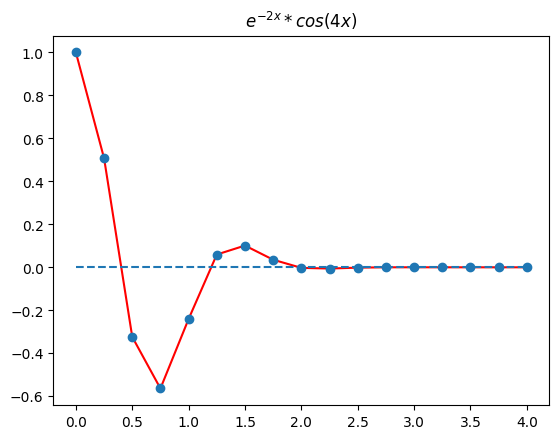

In [9]:
def f(x):
    return np.exp(-(x**2)) * np.cos(4 * x)


# Set the 3rd argument to different numbers, i.e. 11, 10001
x = np.linspace(0, 4, 17)
y = f(x)

plt.plot(x, y, "r")
plt.plot(x, y, "o")
plt.hlines(0, 0, 4, linestyles="dashed")
plt.title(label="$e^{-2x}*cos(4x)$")
plt.show()

In [10]:
# Initialization
root = None

interval = (x[1:] - x[:-1]).mean()
print(f"interval is {interval}")

for i in range(len(x) - 1):
    if y[i] * y[i + 1] < 0:
        # Use linear approximation to calculate the root between two points
        root = x[i] - (x[i + 1] - x[i]) / (y[i + 1] - y[i]) * y[i]
        break  # Jump out of loop

if root is None:
    print("Could not find any root in [%g, %g]" % (x[0], x[-1]))
else:
    print("Find (the first) root as x=%g" % root)

interval is 0.25
Find (the first) root as x=0.402576


In [11]:
(x[1:] - x[:-1])

array([0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25,
       0.25, 0.25, 0.25, 0.25, 0.25])

Above code only returns the first-found root. Let's try to find all possible roots.


In [4]:
from numpy import linspace


def brute_force_root_finder(f, a, b, n):
    x = linspace(a, b, n)
    y = f(x)
    roots = []

    # Solution 1: use for
    for i in range(n - 1):
        if y[i] * y[i + 1] < 0:
            root = x[i] - (x[i + 1] - x[i]) / (y[i + 1] - y[i]) * y[i]
            roots.append(root)

    # Solution 2: Use numpy's where() and a function for linear interpolation
    zero_cross = np.where(y[:-1] * y[1:] < 0)[0]

    def linear_interp(x0, x1, y0, y1):
        return x0 - (x1 - x0) / (y1 - y0) * y0

    roots2 = linear_interp(
        x[zero_cross], x[zero_cross + 1], y[zero_cross], y[zero_cross + 1]
    )

    # Two solutions have the same result
    assert np.allclose(roots, roots2)

    return roots2


def f(x):
    return np.exp(-(x**2)) * np.cos(4 * x)


roots = brute_force_root_finder(f, 0, 4, 7)

if len(roots) > 0:
    print(roots)

[0.42456929 1.23527799 1.98240929 3.30718268 3.99338958]


In addition to finding zero points, we can extend the root-finding approach to locate all local maxima and minima. A local maximum or minimum occurs when the value at a point is greater or smaller, respectively, than the values at its adjacent points.

This is a brute-force method, and it is not efficient and have a low accuracy but can be effective under some circumstances.


In [5]:
def brute_force_optimizer(f, a, b, n):
    x = np.linspace(a, b, n)
    y = f(x)

    # Let maxima and minima hold the indices corresponding
    # to (local) maxima and minima points
    minima = []
    maxima = []
    for i in range(n - 1):
        if y[i - 1] < y[i] > y[i + 1]:
            maxima.append(i)
        if y[i - 1] > y[i] < y[i + 1]:
            minima.append(i)

    # Return x and y values
    return [(x[i], y[i]) for i in minima], [(x[i], y[i]) for i in maxima]

In [6]:
minima, maxima = brute_force_optimizer(
    lambda x: np.exp(-(x**2)) * np.cos(4 * x), 0, 4, 1001
)

print("Minima:", minima)
print("Maxima:", maxima)

Minima: [(0.7000000000000001, -0.5772302750838405), (2.152, -0.006670480742256502), (3.66, -7.333826733936654e-07)]
Maxima: [(0.0, 1.0), (1.416, 0.10965467991643564), (2.9, 0.00012651823896373234)]


#### 1.1.1 Discussion

What's the advantages of a brute-force solver?

-   Universality: It can be applied to virtually any problem, without requiring specific knowledge about the problem's structure or properties.

-   Ease of Implementation: Brute-force algorithms are typically straightforward to understand and implement. They don't require complex data structures or advanced algorithmic concepts.

-   Guaranteed to Find a Solution: If a solution exists and the search space is finite, a brute-force solver is guaranteed to find it, given enough time. <= **This is a very important property.**

-   Useful for Small Problems: For small problem sizes, a brute-force solver can be efficient and fast.

-   Benchmarking: Brute-force solutions can serve as a baseline for comparing the performance of more sophisticated algorithms.


### 1.2 Newton-Raphson method

The Newton-Raphson method is a powerful technique for finding roots of a function with fewer steps compared to brute-force methods. It works by repeatedly finding where the tangent line at a point on the function crosses the x-axis.

We start from $x_n$ and reach the next point $x_{n+1}$ by the following formula:

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},\quad n=0,1,2,\ldots, \text{where }
$$

$$
f'(x_n) = \frac {f(x_n)} {(x_n - x_{n+1})}
$$

![Newton-Raphson method](img/04/newton_raph.png)


In [13]:
def naive_Newton(f, dfdx, x, eps):
    while abs(f(x)) > eps:
        x = x - float(f(x)) / dfdx(x)
    return x


def f(x):
    return x**2 - 9


def dfdx(x):
    return 2 * x


print(naive_Newton(f, dfdx, 1000, 0.001))

3.0000276392750296


The Newton-Raphson method's convergence depends on the initial guess and the nature of the function. For the function $f(x) = tanh(x)$, which has a root at $x = 0$.

When starting position $\left | x \right | \le 1.08$, we can get a good answer. However, the method fails to converge for initial guesses with $\left | x \right | \gt 1.09$.

This is because the derivative of $tanh(x)$, which is $1 - tanh(x)^2$, approaches zero as $|x|$ increases. When $|x| > 1.09$, the derivative is so close to zero that the Newton-Raphson update step, $x - f(x) / df(x)$, results in a large jump, leading the method away from the root instead of towards it.

Back to the 1st sentence of this paragraph, the Newton-Raphson method's convergence depends on the **initial guess** and the **nature of the function**. This is a significant characteristics/limitation of the Newton-Raphson method.


In [14]:
import numpy as np


def f(x):
    return np.tanh(x)


def dfdx(x):
    return 1 - np.tanh(x) ** 2


def test_naive_newton(f, dfdx, x, eps):
    try:
        result = naive_Newton(f, dfdx, x, eps)
        return result
    except FloatingPointError as err:
        print(f"caught {err} with {x, eps}")


print(test_naive_newton(f, dfdx, 1.0, 0.001))
print(test_naive_newton(f, dfdx, 1.08, 0.001))
print(test_naive_newton(f, dfdx, -1.08, 0.001))
print(test_naive_newton(f, dfdx, 1.09, 0.001))
print(test_naive_newton(f, dfdx, -1.09, 0.001))
print(test_naive_newton(f, dfdx, -1.1, 0.001))

7.060280364457744e-05
2.3995252668003453e-05
-2.3995252668003453e-05
nan
nan
nan


/var/folders/l2/g62nwg6n517g5516gcjv7mh80000gn/T/ipykernel_29059/2493755483.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  x = x - float(f(x)) / dfdx(x)
/var/folders/l2/g62nwg6n517g5516gcjv7mh80000gn/T/ipykernel_29059/2493755483.py:3: RuntimeWarning: invalid value encountered in scalar subtract
  x = x - float(f(x)) / dfdx(x)


To visualize the Newton-Raphson method, we can plot the function $f(x)$ and its tangent lines at each step.

The tangent line at a point `(x, f(x))` has a slope of `dfdx(x)`, and it intersects the y-axis at `f(x) - dfdx(x) * x`. We can define a function `tangent_line(x)` that takes `x` as input and returns this line as a function of x.

$$
f(x) = ax + b \\
b = f(x) - a * x
$$


In [16]:
def intercept(x, fx):
    return fx(x) - dfdx(x) * x


def tangent_line(x, fx, dfdx):
    def tangent_func(xs, dfdx=dfdx, x=x):
        return dfdx(x) * xs + intercept(x, fx)

    return tangent_func

In [17]:
def naive_Newton_with_plot(f, dfdx, x, eps, n_limit=None):
    n = 1
    while abs(f(x)) > eps:
        x = x - float(f(x)) / dfdx(x)
        plt.scatter([x], [f(x)])
        # plot the tangent line for range of [0, x]
        xs = np.array([0, x])
        ys = tangent_line(x, f, dfdx)(xs)
        plt.plot(xs, ys)
        # add label for n-th point
        plt.text(x, f(x) + 0.05, f"{n}")
        print((n, x, dfdx(x)))
        n += 1
        if n_limit is not None and n >= n_limit:
            break
    return x

-   For the case of 1.08


(1, -1.058953134356349, 0.38336224060761714)
(2, 0.9894042072982381, 0.42678723076557945)
(3, -0.7845667730857784, 0.5705555577821301)
(4, 0.3639981611100067, 0.8783867937357202)
(5, -0.033014696137195654, 0.9989108213733546)
(6, 2.3995252668003453e-05, 0.9999999994242279)
2.3995252668003453e-05


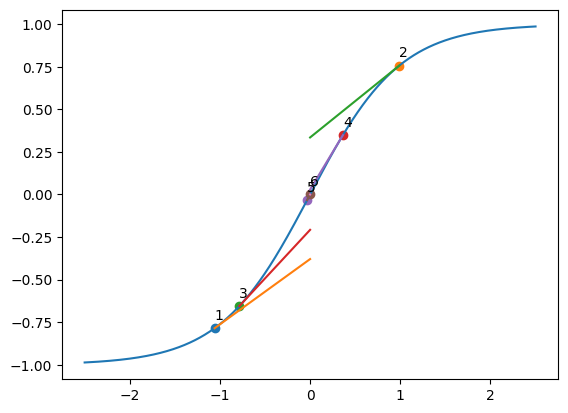

In [19]:
def f(x):
    return np.tanh(x)


def dfdx(x):
    return 1 - np.tanh(x) ** 2


all_xs = np.linspace(-2.5, 2.5, 1000)
plt.plot(all_xs, f(all_xs))
print(naive_Newton_with_plot(f, dfdx, 1.08, 0.001))
plt.show()

-   For the case of 1.09, we got numerical instability.

Instead of converging to the zero point, it diverges to the outside. At point 6, the slope becomes close to zero. It causes the next point to be far away from the zero point from a large jump.


(1, -1.0933161820201083, 0.3630598424724377)
(2, 1.104903543244409, 0.3563893535985908)
(3, -1.1461555078811896, 0.3333661723511766)
(4, 1.3030326182332865, 0.25609061277449485)
(5, -2.064923002377556, 0.06232040629641289)
(6, 13.473142800576014, 7.932987600156594e-12)
13.473142800576014


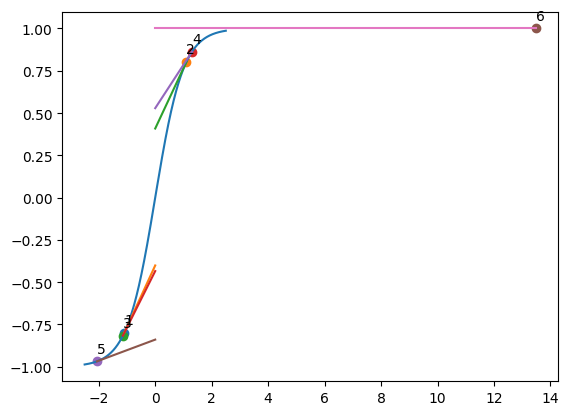

(1, -1.0933161820201083, 0.3630598424724377)
(2, 1.104903543244409, 0.3563893535985908)
(3, -1.1461555078811896, 0.3333661723511766)
(4, 1.3030326182332865, 0.25609061277449485)
(5, -2.064923002377556, 0.06232040629641289)
(6, 13.473142800576014, 7.932987600156594e-12)
(7, -126055913647.13739, 0.0)
-126055913647.13739


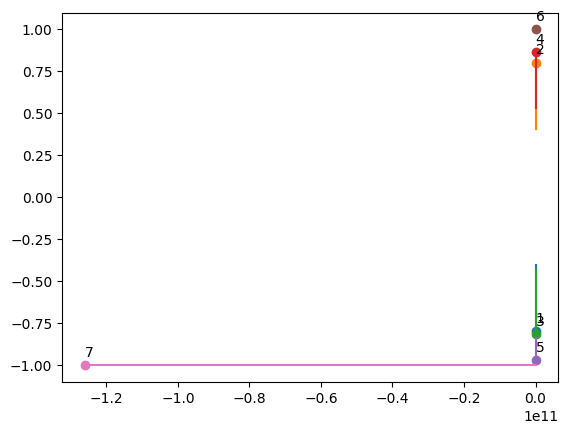

In [20]:
all_xs = np.linspace(-2.5, 2.5, 1000)
plt.plot(all_xs, f(all_xs))
# set n_limit
print(naive_Newton_with_plot(f, dfdx, 1.09, 0.001, n_limit=7))
plt.show()

print(naive_Newton_with_plot(f, dfdx, 1.09, 0.001, n_limit=8))
plt.show()

`dfdx(x)` could be close to zero so we can prevent the exception of division of zero by adding a check.


In [13]:
def robust_Newton(f, dfdx, x, eps):
    np.seterr(all="raise")
    while abs(f(x)) > eps:
        if np.abs(dfdx(x)) > np.sqrt(np.finfo(float).eps):
            x = x - float(f(x)) / dfdx(x)
        else:
            return None
    return x


print(robust_Newton(f, dfdx, 1.09, 0.001))
print(robust_Newton(f, dfdx, 1.08, 0.001))

None
2.3995252668003453e-05


#### 1.2.1 Newton's Method Pitfalls (some if not all are shared with Secant method)

While Newton's method can be highly efficient, it's sensitive to the initial guess. Here are some potential issues with a "bad start":

1. **Non-Convergence**: The sequence ${x_n}$ may wander around without converging. This can occur when there are only complex roots to the equation.

2. **Divergence**: The sequence ${x_n}$ may diverge to $\infty$. This can happen when f is positive and monotonically decreasing on an unbounded interval.

3. **Cycling**: The sequence ${x_n}$ may enter a cycle, repeating the same values over and over.

4. **Convergence to Wrong Root**: If the initial approximation $x_0$ is too far from the desired root, ${x_n}$ may converge to a different root. This typically happens when $f_0 = f(x_0)$ is small.

For example, the following call to a robust version of the Newton's method enters an infinite loop because the function f(x) = x^2 + 2 has no real roots:

```python
# infinite loop
robust_Newton(lambda x: x*x + 2, lambda x: 2*x, 3, 0.0000001)
```


#### 1.2.2 Exercise

Here are some enhancements we can make to our implementation of Newton's method:

-   **Avoid Division by Zero**: If the derivative `dfdx(x)` is zero, the Newton-Raphson update step will involve division by zero. We should check for this condition and exit the function if it occurs.

-   **Save Time by Avoiding Extra Function Evaluations**: Each evaluation of `f(x)` can be computationally expensive. We should structure our code to minimize the number of times `f(x)` is evaluated.


### 1.3 Secant method


When the derivative `f'(x)` is challenging to compute or computationally expensive, we can modify Newton's method to avoid using the derivative. This leads to the Secant method, which uses secant lines instead of tangent lines.


The derivation of the Secant method.

We start from the equation of the secant line passing through the points $(x_{n-1}, f(x_{n-1}))$ and $(x_n, f(x_n))$:
$$\frac {f(x_{n-1})} {x_{n-1} - x_{n + 1}} = \frac {f(x_{n})} {x_{n} - x_{n + 1}}$$

Solving for $x_{n+1}$, we get:

$${f(x_{n-1})} x_n - {f(x_{n-1})} x_{n+1} = {f(x_{n})} x_{n-1} - {f(x_{n})} x_{n + 1}$$

$${f(x_{n-1})} x_n - {f(x_{n})} x_{n-1} = {f(x_{n-1})} x_{n+1} - {f(x_{n})} x_{n + 1}$$

$$ x*{n + 1} = \frac { {f(x*{n-1})} x*n - {f(x*{n})} x*{n-1} } { {f(x*{n-1})} - {f(x\_{n})} } $$

$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n)-f(x_{n-1})}
$$

![Secant method](img/04/secant.png)


#### 1.3.1 Discussion

When choosing between Newton's method and the Secant method, consider whether the analytical form of the derivative is known:

**If the derivative is known analytically**, use Newton's method. The analytical form provides a direct and accurate calculation of the derivative, which makes Newton's method efficient and precise.

**If the derivative is not known analytically**, use the Secant method. If we use numerical differentiation, which approximates the derivative, can introduce accuracy problems. The Secant method avoids this issue by using a finite difference approximation based on two successive points.

The trade-off of the Secant method is that we need to decide the initial two points. The initial two points are crucial to the convergence of the Secant method. If the initial two points are too close, the Secant method may not converge. If the initial two points are too far away, the Secant method may converge slowly.


#### 1.3.2 Exercise

-   Update the code of Newton's method for the Secant method.
-   Identify the case for the scenarios described above


### 1.4 Bisection method

While Newton's and Secant methods are conditionally reliable and depend on the starting position, the Bisection method guarantees finding a solution. However, like the Newton's method and Secant method, it only finds one solution if multiple exist. The Bisection method trades speed for reliability, typically being slower than the other two methods.

Steps of the Bisection Method:

1. **Input**: An interval $[a, b]$.
2. **Test**: Evaluate the function at the midpoint $M$ of the current interval.
    - If $f(M) \approx 0$, then $M$ is the root.
    - If not, but the sub-interval too small, then we may consider no root. Otherwise, proceed to the next step.
3. **Update**: Choose the sub-interval where the function changes sign (i.e., $f(a) \cdot f (M) < 0$. or $f(M) \cdot f (b) < 0$. This new sub-interval is half the size of the previous interval.
4. **Repeat**: Go back to Step 2 with the new sub-interval.


In [14]:
from typing import Callable


def bisection(
    f: Callable[float, float],
    x_L: float,
    x_R: float,
    eps: float,
    return_x_list: bool = False,
    do_plot: bool = False,
):
    if do_plot:
        xs = np.linspace(x_L, x_R, 1000)
        ys = f(xs)
        plt.plot(xs, ys)
        # use by later plots
        ys_min = ys.min()
        ys_max = ys.max()
        ys = [ys_min, ys_max]

    f_L = f(x_L)

    x_M = float(x_L + x_R) / 2.0
    f_M = f(x_M)
    if do_plot:
        xs = [x_M, x_M]
        plt.plot(xs, ys, "--")
        plt.text(xs[0], max(ys), "1")

    if return_x_list:
        x_list = []

    iter = 2

    while abs(f_M) > eps and (x_M - x_L) > eps / 1000:
        if f_L * f_M > 0:  # i.e. same sign
            x_L = x_M
            f_L = f_M
        else:
            x_R = x_M
            _f_R = f_M

        x_M = float(x_L + x_R) / 2
        f_M = f(x_M)

        if do_plot:
            xs = [x_M, x_M]
            plt.plot(xs, ys, "--")
            plt.text(xs[0], max(ys), f"{iter}")

        if return_x_list:
            x_list.append(x_M)

        iter += 1

    if do_plot:
        plt.show()

    if abs(f_M) < eps:
        if return_x_list:
            return x_M, x_list
        return x_M, []
    return None, []

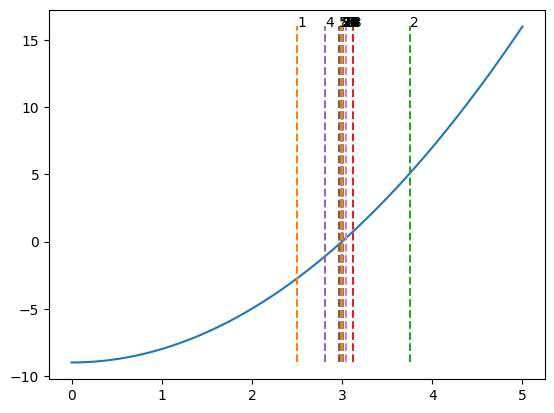

A solution is: 3.0000000004656613, 30, 3.0000000004656613
A solution is: 3.0000000004656613, 31, 3.0000000004656613
A solution is: 3.000000001520675, 40, 3.000000001520675


In [15]:
def f(x):
    return x**2 - 9


def test_bisect(a, b, do_plot=False):
    solution, x_list = bisection(
        f, a, b, eps=1.0e-8, return_x_list=True, do_plot=do_plot
    )
    if solution is None:
        print("No solution found")
    else:
        print(
            f"A solution is: {solution}, {len(x_list)}, {x_list[-1] if len(x_list) > 0 else []}"
        )


test_bisect(a=0, b=5, do_plot=True)
test_bisect(a=0, b=10)
test_bisect(a=0, b=10000)

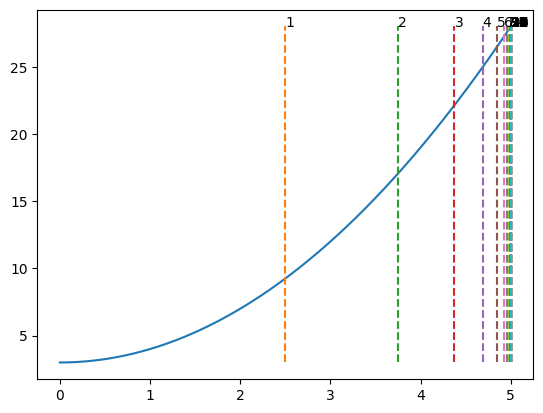

No solution found
No solution found


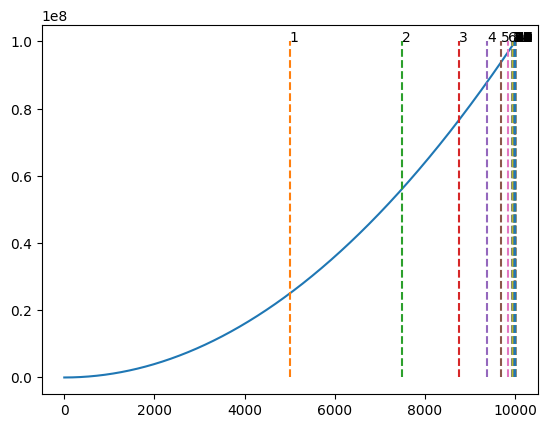

No solution found


In [16]:
def f(x):
    return x**2 + 3


def test_bisect(a, b, do_plot=False):
    solution, x_list = bisection(
        f, a, b, eps=1.0e-8, return_x_list=True, do_plot=do_plot
    )
    if solution is None:
        print("No solution found")
    else:
        print(
            f"A solution is: {solution}, {len(x_list)}, {x_list[-1] if len(x_list) > 0 else []}"
        )


test_bisect(a=0, b=5, do_plot=True)
test_bisect(a=0, b=10)
test_bisect(a=0, b=10000, do_plot=True)

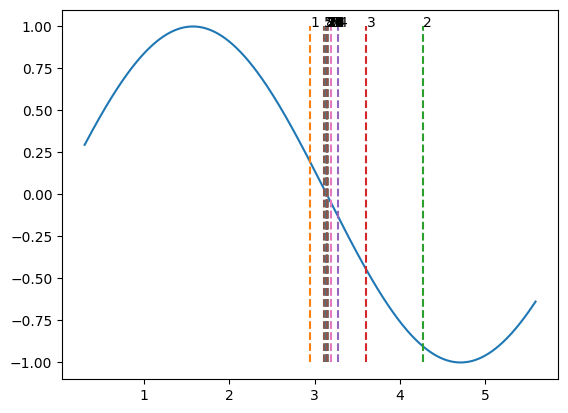

A solution is: 3.141592650299634, 24, 3.141592650299634
A solution is: 3.1415926562622194, 28, 3.1415926562622194
A solution is: 91.10618695987684, 37, 91.10618695987684


In [17]:
def f(x):
    return np.sin(x)


def test_bisect(a: float, b: float, do_plot=False):
    solution, x_list = bisection(
        f, a, b, eps=1.0e-8, return_x_list=True, do_plot=do_plot
    )
    if solution is None:
        print("No solution found")
    else:
        print(
            f"A solution is: {solution}, {len(x_list)}, {x_list[-1] if len(x_list) > 0 else []}"
        )


test_bisect(a=0.3, b=np.pi * 1.78, do_plot=True)
test_bisect(a=0.3, b=10)
test_bisect(a=0.3, b=10000)

#### 1.4.1 Exercise: Enhancing the Bisection Method

The Bisection method may run indefinitely for some cases, such as `x**2 + 3`, which has no real solutions. To address this, we can enhance the method as follows:

-   **Track Iterations**: Modify the function to return the number of iterations performed.
-   **Limit Iterations**: Add an optional `max_iter` argument. If provided, the function should not exceed this number of iterations.
-   **Terminate on Small Interval**: If the interval size `x_M - x_L` is less than a certain tolerance (eps), terminate the loop.
-   **Custom Division Ratio**: Add an optional argument to use a different ratio for dividing the interval. Set the default ratio to 0.618 (the golden ratio).
-   **Test and Compare**: Test the enhanced Bisection method and the Newton's method on a linear equation and a non-linear equation. Compare the two methods in terms of accuracy and number of iterations, using the same tolerance eps = 1e-4.

You can obtain the derivatives for the Newton's method by hand or use an online tool like Wolfram Alpha (https://www.wolframalpha.com/). For example, search for "derivative of sin x + cos x".


### 1.5 Convergence Test

The rate of convergence, which is closely related to the number of iterations needed to find a solution, can be measured using the successive difference $\it{e}_n=\left | x_{n+1} − x_n \right |$. As we approach the solution, $e_n$ is expected to decrease.

We define the convergence rate q using the relation $\it{e}_{n+1}=Ce_n^q$, where $C$ is a constant. The exponent $q$ indicates how quickly the error reduces from one iteration to the next. A larger q means faster convergence and fewer iterations needed to meet the stopping criterion $\left |f(x) \right | \lt \epsilon$.

The convergence rate $q$ can be calculated as:

$$
q = \frac {\ln {(e_{n+1}/e_n)}} {\ln(e_n/e_{n−1})}
$$


Note: To calculate one value of `q`, we need three $e({n-1,n,n+1})$ and four adjacent result $x({n-2, n-1, n, n+1})$.


In [18]:
import numpy as np


def rate(xs):
    errors = np.abs([a - b for a, b in zip(xs[:-1], xs[1:])])
    # q = [
    #     np.log(e[n + 1] / e[n]) / np.log(e[n] / e[n - 1])
    #     for n in range(1, len(e) - 1, 1)
    # ]
    ratios = np.divide(errors[1:], errors[:-1])
    q = np.divide(np.log(ratios[1:]), np.log(ratios[:-1]))
    return q


def print_rates(method, xs):
    print(method + ":")
    for q_ in rate(xs):
        print(f"{q_:.4f}")

In [19]:
# For example as we approach to the solution with following values
# [1.5,1.2,1.0,0.9,0.85,0.8]

import numpy as np

print(np.log((1.0 - 0.9) / (1.2 - 1.0)) / np.log((1.2 - 1.0) / (1.5 - 1.2)))
print(np.log((0.9 - 0.85) / (1.0 - 0.9)) / np.log((1.0 - 0.9) / (1.2 - 1.0)))
print(np.log((0.85 - 0.8) / (0.9 - 0.85)) / np.log((0.9 - 0.85) / (1.0 - 0.9)))

# Replicated above with print_rate() function.
print_rates("This method", [1.5, 1.2, 1.0, 0.9, 0.85, 0.8])

1.709511291351453
0.9999999999999984
3.2034265038149265e-15
This method:
1.7095
1.0000
0.0000


#### 1.5.1 Exercise

Update the code for the Newton's method to allow the measurement of convergence rate while solving the equation

Hint:

-   The solver function shall return the list of values that it went through. This shall be controlled by a new argument `return_list=True or False`
-   return the list of `x` instead of final `x`, when `return_list` is True


### 1.6 Summary

In this section, we explored three distinct methods for solving the equation `f(x) = 0`:

-   **Newton-Raphson Method**: This method uses the derivative `f'(x)` to find the root. It's efficient and precise when the derivative is known analytically.

-   **Secant Method**: This method is useful when the derivative `f'(x)` is unknown or hard to compute. It approximates the derivative using two successive points.

-   **Bisection Method**: This method guarantees finding a solution by repeatedly bisecting an interval where `f(x)` changes sign. It's slower but more reliable than the other two methods.


## 2. Assignment

Use 1-D data with newton_system to solve below questions.

1. **Find IRR for a Bond**: Given a bond with current price $C_0 = 95$, an annual coupon of 3%, and exactly 4 years to maturity, find the Internal Rate of Return (IRR) that satisfies the Net Present Value (NPV) equation:

$$
\mathrm{NPV} = \sum_{i=1}^{n} {\frac {\mathrm{CF}} {(1+\mathrm{IRR})^i}} - C_0 = 0
$$

2. To find implied volatility for B-S model. The price of an option is a function of volatility, . Solve $\sigma$ for a given V.

**Find Implied Volatility for Black-Scholes Model**: Given the price of an option value as a function of volatility, $V = f(\sigma)$, solve for $\sigma$ that matches a given $V$. The derivative of $V$ with respect to $\sigma$ is known as Vega:

$$
\text{Vega} = \frac {\mathrm{d} V} {\mathrm{d} \sigma}
$$

1. Verify that Vega formula is numerically close to the derivative of V with respect to a small change in sigma.

```python
def bsprices(S0, K, T, r, sigma):
    # Calculate call and put prices using Black-Scholes formula
    # ...

def bsvega(S0, K, T, r, sigma):
    # Calculate Vega using Black-Scholes formula
    # ...

# Verify Vega formula
call, put = bsprices(S0, K, T, r, sigma)
call2, put2 = bsprices(S0, K, T, r, sigma + 0.01)
print((call2 - call) / 0.01, (put2 - put) / 0.01)  # Should be close to bsvega
```

2.  Use the Newton's method to calculate the implied volatility when `call = 2.5` or `put = 2.5`. For put options, there's a caveat that you should comment on.

3.  Finally, Plot $\sigma$ vs $\it{Call Price}$ and $\sigma$ vs $\it{Put Price}$ in range of $(0, 10]$

Below is the source code to calculate BS price (output tuple [0] is call, [1] for put) and BS Vega (same for call and put) from market input


In [2]:
import numpy as np
def newton_method(f, df, x0, tol=1e-10, max_iter=100):
    """
    Implement the Newton-Raphson method for finding roots of a real-valued function.
    
    :param f: The function for which we are trying to find a root.
    :param df: The derivative of the function f.
    :param x0: Initial guess for the root.
    :param tol: The tolerance for the error of the solution.
    :param max_iter: The maximum number of iterations to perform.
    :return: The estimated root of the function and the number of iterations used.
    """
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < tol:
            # Found a root within tolerance
            return xn
        dfxn = df(xn)
        if dfxn == 0:
            # Derivative is zero, stop iteration to avoid division by zero
            raise ValueError('Derivative is zero. No solution found.')
        xn = xn - fxn/dfxn
    # If max iteration reached and root not found
    raise ValueError('Exceeded maximum iterations. No solution found.')

# Define the cash flow for the bond
cash_flows = np.array([-95, 3, 3, 3, 103])  # Initial outflow of 95, then 3 per year, and 103 in the last year

# Define the function to calculate NPV
def npv(irr):
    years = np.arange(len(cash_flows))
    return np.sum(cash_flows / ((1 + irr) ** years))

# Define the derivative of the NPV function
def dnpv(irr):
    years = np.arange(len(cash_flows))
    return np.sum(-years * cash_flows / ((1 + irr) ** (years + 1)))

# Initial guess for the IRR
initial_guess = 0.03  # Start with the coupon rate

# Apply Newton's method
irr_estimated = newton_method(npv, dnpv, initial_guess)

irr_estimated


0.04390137479727136

In [4]:
import numpy as np
import scipy.stats as sps


def bsprices(S0, K, T, r, sigma):
    """Black-Scholes call and put option pricing
    Parameters
    ----------
    S0 : Current price of the underlying stock
    K : Strike price of the option
    T : Time to maturity of the option
    r : Risk-free rate of return (continuously-compounded)
    sigma : Stock price volatility

    Returns
    -------
    c : Call option price
    p : Put option price

    Notes
    -----
    r, T, and sigma must be expressed in consistent units of time
    """

    x0 = sigma * np.sqrt(T)
    erT = np.exp(-r * T)
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / x0
    d2 = d1 - x0
    Nd1 = sps.norm.cdf(d1)
    Nd2 = sps.norm.cdf(d2)
    c = S0 * Nd1 - K * erT * Nd2
    p = K * erT * (1 - Nd2) - S0 * (1 - Nd1)
    return c, p


if __name__ == "__main__":
    S0 = 100  # $100 stock price
    K = 105  # $105 strike price
    T = 3 / 12  # 3 month period
    r = 0.004  # 3 month T-bill
    sigma = 0.3  # 30% per annum
    call, put = bsprices(S0, K, T, r, sigma)
    print(f"Call and Put Prices: {call:3.3f}, {put:3.3f}")
    print(
        put - call,
        K * np.exp(-r * T) - S0,
        np.isclose(put - call, K * np.exp(-r * T) - S0),
    )

    call2, put2 = bsprices(S0, K, T, r, sigma + 0.01)
    print((call2 - call) / 0.01, (put2 - put) / 0.01, call2, put2)

Call and Put Prices: 3.985, 8.880
4.89505248250439 4.895052482504383 True
19.393859993088114 19.393859993088824 4.178870302287301 9.073922784791698


In [5]:
def bsvega(S0, K, T, r, sigma):
    x0 = sigma * np.sqrt(T)
    erT = np.exp(-r * T)
    d1 = (np.log(S0 / K) + (r + sigma**2 / 2) * T) / x0
    vega = S0 * sps.norm.pdf(d1) * np.sqrt(T)
    return vega

In [39]:
# To find implied volatility for B-S model using the Newton method
def find_implied_volatility(type, S, K, T, r, market_price, sigma_estimate=0.2, tolerance=1e-5, max_iterations=100):
    sigma = sigma_estimate
    for i in range(max_iterations):
        if type == 'c':
            price = bsprices(S, K, T, r, sigma)[0]
        elif type == 'p':
            price = bsprices(S, K, T, r, sigma)[1]
        else:
            raise ValueError('Please type c for call and type p for put.')

        v = bsvega(S, K, T, r, sigma)
        
        price_diff = market_price - price
        if abs(price_diff) < tolerance:
            return sigma
        
        sigma = sigma + price_diff / v
        
        if sigma < 0: # Ensure sigma stays positive
            sigma = tolerance
            
    return sigma

# Example parameters
S0 = 100  # $100 stock price
K = 105  # $105 strike price
T = 3 / 12  # 3 month period
r = 0.004  # 3 month T-bill
# sigma = 0.3  # 30% per annum
market_price = 3.985  # Market price of the option

implied_volatility = find_implied_volatility('c', S0, K, T, r, market_price)
print(f"Implied Volatility: {implied_volatility:.4f}")

Implied Volatility: 0.3000


In [40]:
# Verify that Vega formula is numerically close to the derivative of V with respect to a small change in sigma.
call, put = bsprices(S0, K, T, r, sigma)
call2, put2 = bsprices(S0, K, T, r, sigma + 0.01)

realvega = bsvega(S0, K, T, r, sigma)
print((call2 - call) / 0.01, (put2 - put) / 0.01, realvega)  # Should be close to bsvega

19.393859993088114 19.393859993088824 19.363962308674264


In [58]:
# Use the Newton's method to calculate the implied volatility when `call = 2.5` or `put = 2.5`. For put options, there's a caveat that you should comment on.
call_iv = find_implied_volatility('c', S0, K, T, r, 2.5)
put_iv = find_implied_volatility('p', S0, K, T, r, 2.5)
print(call_iv, put_iv)

# The vega of an option can become very flat for deep in-the-money or deep out-of-the-money options. 
# This is particularly true for put options, where the price might change very little with volatility in these scenarios. 
# Since Newton's method uses the reciprocal of the derivative (vega, in this case) to find the next estimate, a flat vega can lead to large, unstable jumps in the estimated volatility.
#

0.22199214830506495 1e-05


/var/folders/l2/g62nwg6n517g5516gcjv7mh80000gn/T/ipykernel_30454/3887117031.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = sigma + price_diff / v


In [49]:
import matplotlib.pyplot as plt

In [45]:
premium = np.linspace(0.1, 10, 101)

call_ivs = [find_implied_volatility('c', S0, K, T, r, i) for i in premium]
put_ivs = [find_implied_volatility('p', S0, K, T, r, i) for i in premium]

Text(0.5, 1.0, 'Relationship between sigma and options prices')

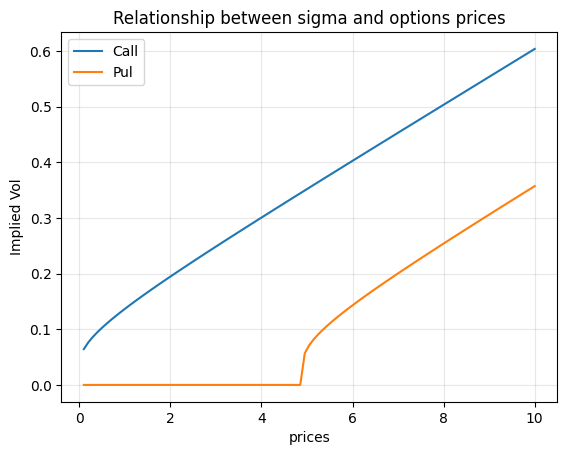

In [57]:
plt.plot(premium, call_ivs)
plt.plot(premium, put_ivs)
plt.xlabel('prices')
plt.ylabel('Implied Vol')
plt.legend(['Call','Pul'])
plt.grid(alpha = 0.3)
plt.title('Relationship between sigma and options prices')

##### Appendix: timestamp


In [42]:
from datetime import datetime

print(f"Generated on {datetime.now()}")

Generated on 2024-03-12 10:08:09.424971
